In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def qtd_eventos(integer):
    return int((400 - integer) / 2)

def preprocess_input(X,y):
    X = X.copy()
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,stratify=y)
    scaler = StandardScaler()   
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train,X_test,y_train,y_test,scaler

In [20]:
df = pd.read_csv('../../data/crawler/unified-events-statistics-with-kills.csv')

qtd_eventos = list(map(qtd_eventos, df.isnull().sum(axis=1).tolist()))
df['qtd_eventos'] = qtd_eventos
df = df.replace([
    'BLUE: kill',
    'BLUE: plate',
    'BLUE: first_blood',
    'BLUE: dragon',
    'BLUE: herald',
    'BLUE: voidgrub',
    'BLUE: first_tower_top',
    'BLUE: first_tower_mid',
    'BLUE: first_tower_bot',
    'BLUE: second_tower_top',
    'BLUE: second_tower_mid',
    'BLUE: second_tower_bot',
    'BLUE: third_tower_top',
    'BLUE: third_tower_mid',
    'BLUE: third_tower_bot',
    'BLUE: inhibitor_top',
    'BLUE: inhibitor_mid',
    'BLUE: inhibitor_bot',
    'BLUE: baron',
    'BLUE: elder_dragon',
    'BLUE: nexus_tower',
    'BLUE: nexus',
    'RED: kill',
    'RED: plate',
    'RED: first_blood',
    'RED: dragon',
    'RED: herald',
    'RED: voidgrub',
    'RED: first_tower_top',
    'RED: first_tower_mid',
    'RED: first_tower_bot',
    'RED: second_tower_top',
    'RED: second_tower_mid',
    'RED: second_tower_bot',
    'RED: third_tower_top',
    'RED: third_tower_mid',
    'RED: third_tower_bot',
    'RED: inhibitor_top',
    'RED: inhibitor_mid',
    'RED: inhibitor_bot',
    'RED: baron',
    'RED: elder_dragon',
    'RED: nexus_tower',
    'RED: nexus'], range(1,45))

df = df.drop(['game','blueTopChampion','blueJungleChampion','blueMidChampion','blueADCChampion','blueSupportChampion','redTopChampion','redJungleChampion','redMidChampion','redAdcChampion','redSupportChampion'],axis=1)
df = df.fillna(0)
df = df.astype(int)
y = df['result'].copy()
X = df.drop(['golId','result','qtd_eventos'],axis=1)


In [21]:
def cv_modelo(model, X_modelo):
    # Definindo as métricas
    scoring = {
        'Balanced Accuracy': make_scorer(balanced_accuracy_score),
        'Precision': make_scorer(precision_score, average='weighted'),
        'Recall': make_scorer(recall_score, average='weighted'),
        'F1': make_scorer(f1_score, average='weighted'),
        'AUC': make_scorer(roc_auc_score, needs_proba=True, average='weighted')
    }

    # Realizando a validação cruzada
    cv_results = cross_validate(model, X_modelo, y, cv=5, scoring=scoring, error_score='raise')

    print(model)
    for metric, scores in cv_results.items():
        print(f'{metric}: {scores.mean()} (+/- {scores.std()})')

In [22]:
# Analisando dados da partida completa
models = [
        RandomForestClassifier(max_depth=50, n_estimators=600, min_samples_split=2, min_samples_leaf=1),
        LogisticRegression(max_iter=50000),
        SVC(C=100,gamma=0.001,kernel='rbf',max_iter=50000,probability=True),
        DecisionTreeClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(criterion='friedman_mse',learning_rate=0.025,loss='deviance',max_depth=4,max_features='log2',min_samples_leaf=8,min_samples_split=3, n_estimators=100,subsample=0.5),
        KNeighborsClassifier(n_neighbors=3),
        GaussianNB()
    ]

for model in models:    
    cv_modelo(model, X)
    print('------------------')


RandomForestClassifier(max_depth=50, n_estimators=600)
fit_time: 0.7806506633758545 (+/- 0.09558750021905814)
score_time: 0.12970290184020997 (+/- 0.010664807127534238)
test_Balanced Accuracy: 0.785897435897436 (+/- 0.05616183807885602)
test_Precision: 0.8185034013605442 (+/- 0.06165742620563176)
test_Recall: 0.8076190476190476 (+/- 0.05230297225807994)
test_F1: 0.8030291489815298 (+/- 0.052794464455814594)
test_AUC: 0.8731481481481482 (+/- 0.06722894064903681)
------------------
LogisticRegression(max_iter=50000)
fit_time: 0.18068308830261232 (+/- 0.0074438928349650265)
score_time: 0.011252593994140626 (+/- 0.0007719516651060016)
test_Balanced Accuracy: 0.7317307692307693 (+/- 0.0773532310489656)
test_Precision: 0.7552210012210011 (+/- 0.0849072476542201)
test_Recall: 0.739047619047619 (+/- 0.0779790075826999)
test_F1: 0.7377006560199838 (+/- 0.07488148942119134)
test_AUC: 0.7735042735042735 (+/- 0.046915106130338384)
------------------
SVC(C=100, gamma=0.001, max_iter=50000, probabil

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\User

DecisionTreeClassifier()
fit_time: 0.009734106063842774 (+/- 0.002103375682120263)
score_time: 0.01459674835205078 (+/- 0.0022725597645843467)
test_Balanced Accuracy: 0.7316239316239316 (+/- 0.038778666471866396)
test_Precision: 0.7488500388500388 (+/- 0.042564720404079194)
test_Recall: 0.74 (+/- 0.05053904442446325)
test_F1: 0.7393245444630943 (+/- 0.04727482626862485)
test_AUC: 0.7316239316239316 (+/- 0.03877866647186641)
------------------
AdaBoostClassifier()
fit_time: 0.10256633758544922 (+/- 0.009884955819712852)
score_time: 0.029857063293457033 (+/- 0.004031814379855194)
test_Balanced Accuracy: 0.7596153846153847 (+/- 0.04421450834502156)
test_Precision: 0.7784737484737485 (+/- 0.050518762841461624)
test_Recall: 0.7785714285714286 (+/- 0.04971574528052641)
test_F1: 0.7756727579920857 (+/- 0.048774231965499244)
test_AUC: 0.7535612535612536 (+/- 0.07781057874662692)
------------------
GradientBoostingClassifier(learning_rate=0.025, max_depth=4,
                           max_featu

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


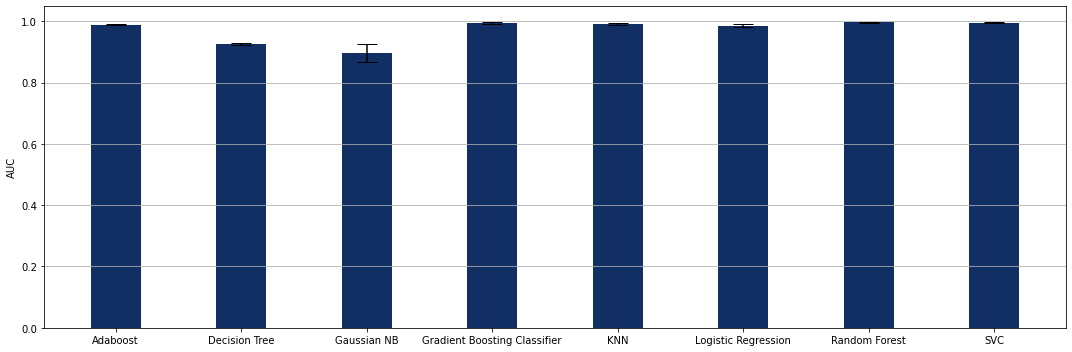

In [23]:
plt.rc('font', weight='regular')

modelos = ['Adaboost','Decision Tree','Gaussian NB','Gradient Boosting Classifier','KNN','Logistic Regression','Random Forest','SVC']
x_pos = np.arange(len(modelos))
CTEs = [0.9893705943396093,0.9261179844611931,0.8971671544650668,0.9941532562525524,0.9920181272682017,0.9856712461822381,0.9960813657634715,0.9958964018011303]
error = [0.0013844669302841533,0.0031095439964233433,0.030192821590197802,0.0024098303050344365,0.002699073942375277,0.004830649578292166,0.0024671285379814466,0.0021531698491687157]

# Build the plot
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(x_pos, CTEs, yerr=error, align='center', color='#112f63', capsize=10,width=0.4)
ax.set_ylabel('AUC')
ax.set_xticks(x_pos)
ax.set_xticklabels(modelos)
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

In [24]:
early_start = 0
early_end = 0

# Criar uma lista com o nome dos eventos e seus respectivos tempos
eventos = ['event{}'.format(i) for i in range(1, 201)]
tempos = ['event{}time'.format(i) for i in range(1, 201)]

# Filtrar apenas os eventos que aconteceram antes de 10 minutos
eventos_draft = []

for evento, tempo in zip(eventos, tempos):
    eventos_draft.append(df[(df[tempo] >= early_start) & (df[tempo] <= early_end)][evento])

eventos_draft.append(df[['blueTopGP','blueTopWR','blueTopKDA','blueJungleGP','blueJungleWR','blueJungleKDA','blueMidGP','blueMidWR','blueMidKDA','blueADCGP','blueADCWR','blueADCKDA','blueSupportGP','blueSupportWR','blueSupportKDA','redTopGP','redTopWR','redTopKDA','redJungleGP','redJungleWR','redJungleKDA','redMidGP','redMidWR','redMidKDA','redAdcGP','redAdcWR','redAdcKDA','redSupportGP','redSupportWR','redSupportKDA']])

# Criar um novo DataFrame com os eventos que aconteceram antes de 10 minutos
df_draft = pd.concat(eventos_draft, axis=1)
df_draft = df_draft.fillna(0)
df_draft = df_draft.astype(int)
X_draft = df_draft.copy()

# Analisando dados do early game
models = [
        RandomForestClassifier(max_depth=50, n_estimators=600, min_samples_split=2, min_samples_leaf=1),
        LogisticRegression(max_iter=50000),
        SVC(C=100,gamma=0.001,kernel='rbf',max_iter=50000,probability=True),
        DecisionTreeClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(criterion='friedman_mse',learning_rate=0.025,loss='deviance',max_depth=4,max_features='log2',min_samples_leaf=8,min_samples_split=3, n_estimators=100,subsample=0.5),
        KNeighborsClassifier(n_neighbors=3),
        GaussianNB()
    ]

for model in models:    
    cv_modelo(model, X_draft)
    print('------------------')


RandomForestClassifier(max_depth=50, n_estimators=600)
fit_time: 0.7093641281127929 (+/- 0.023646848332370896)
score_time: 0.11532325744628906 (+/- 0.004421632552215207)
test_Balanced Accuracy: 0.5935897435897435 (+/- 0.15836721208073704)
test_Precision: 0.6333015873015873 (+/- 0.1802283034670812)
test_Recall: 0.6414285714285715 (+/- 0.14879409443819516)
test_F1: 0.6156367714893061 (+/- 0.1581741545814127)
test_AUC: 0.6013265669515669 (+/- 0.08698920597810306)
------------------
LogisticRegression(max_iter=50000)
fit_time: 0.059428167343139646 (+/- 0.005052092511678991)
score_time: 0.009832000732421875 (+/- 0.001092381005689017)
test_Balanced Accuracy: 0.49423076923076925 (+/- 0.10558799114095714)
test_Precision: 0.514021164021164 (+/- 0.1334061697420642)
test_Recall: 0.5466666666666666 (+/- 0.10564133046752035)
test_F1: 0.5117648284468561 (+/- 0.10627228508631575)
test_AUC: 0.5400551994301994 (+/- 0.10041634877152172)
------------------
SVC(C=100, gamma=0.001, max_iter=50000, probabil

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GradientBoostingClassifier(learning_rate=0.025, max_depth=4,
                           max_features='log2', min_samples_leaf=8,
                           min_samples_split=3, subsample=0.5)
fit_time: 0.04160561561584473 (+/- 0.002088871197996694)
score_time: 0.008849716186523438 (+/- 0.0005166801719259335)
test_Balanced Accuracy: 0.49155982905982903 (+/- 0.04774146977523019)
test_Precision: 0.47214822771213755 (+/- 0.17428370997364445)
test_Recall: 0.5766666666666665 (+/- 0.04829050412985605)
test_F1: 0.46456574190445166 (+/- 0.05899667634024086)
test_AUC: 0.5797809829059829 (+/- 0.17697682716390992)
------------------
KNeighborsClassifier(n_neighbors=3)
fit_time: 0.003217601776123047 (+/- 0.0010706157621105923)
score_time: 0.011241674423217773 (+/- 0.0010861693903310623)
test_Balanced Accuracy: 0.46762820512820513 (+/- 0.10566482371700013)
test_Precision: 0.5305480140774258 (+/- 0.1555885751487321)
test_Recall: 0.5176190476190476 (+/- 0.10908400307969615)
test_F1: 0.4790362583229578

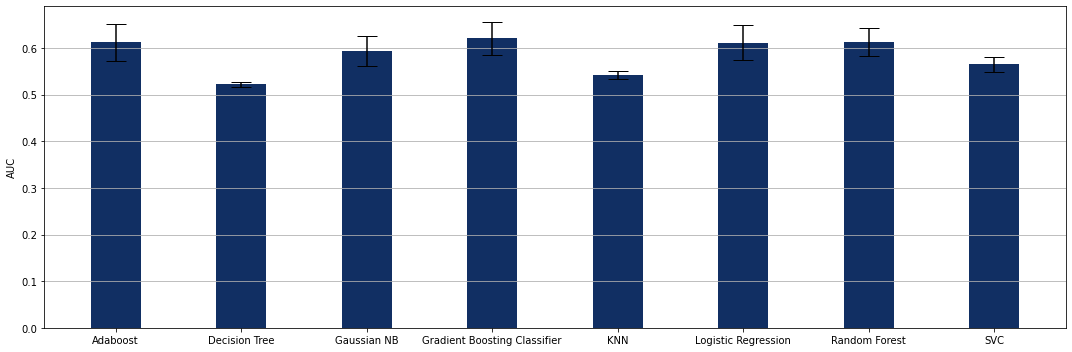

In [25]:
plt.rc('font', weight='regular')

modelos = ['Adaboost','Decision Tree','Gaussian NB','Gradient Boosting Classifier','KNN','Logistic Regression','Random Forest','SVC']
x_pos = np.arange(len(modelos))
AUCs = [0.6121695174487173,0.521964638707183,0.5941385637000948,0.6208964235146262,0.5424501856943921,0.6115918496178956,0.6120055642383413,0.5651904727719577]
AUCstd = [0.039567223202984746,0.005213309260513959,0.03205682456005389,0.03539708370467637,0.008363789495420328,0.03802311871153992,0.029813222037598737,0.016411260253704436]

# Build the plot
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(x_pos, AUCs, yerr=AUCstd, align='center', color='#112f63', capsize=10,width=0.4)
ax.set_ylabel('AUC')
ax.set_xticks(x_pos)
ax.set_xticklabels(modelos)
ax.yaxis.grid(True)

# Show figure
plt.tight_layout()
plt.show()

In [26]:
early_start = 0
early_end = 10

# Criar uma lista com o nome dos eventos e seus respectivos tempos
eventos = ['event{}'.format(i) for i in range(1, 201)]
tempos = ['event{}time'.format(i) for i in range(1, 201)]

# Filtrar apenas os eventos que aconteceram antes de 10 minutos
eventos_early = []

for evento, tempo in zip(eventos, tempos):
    eventos_early.append(df[(df[tempo] >= early_start) & (df[tempo] <= early_end)][evento])

eventos_early.append(df[['blueTopGP','blueTopWR','blueTopKDA','blueJungleGP','blueJungleWR','blueJungleKDA','blueMidGP','blueMidWR','blueMidKDA','blueADCGP','blueADCWR','blueADCKDA','blueSupportGP','blueSupportWR','blueSupportKDA','redTopGP','redTopWR','redTopKDA','redJungleGP','redJungleWR','redJungleKDA','redMidGP','redMidWR','redMidKDA','redAdcGP','redAdcWR','redAdcKDA','redSupportGP','redSupportWR','redSupportKDA']])

# Criar um novo DataFrame com os eventos que aconteceram antes de 10 minutos
df_early = pd.concat(eventos_early, axis=1)
df_early = df_early.fillna(0)
df_early = df_early.astype(int)
X_early = df_early.copy()

# Analisando dados do early game
models = [
        RandomForestClassifier(max_depth=50, n_estimators=600, min_samples_split=2, min_samples_leaf=1),
        LogisticRegression(max_iter=50000),
        SVC(C=100,gamma=0.001,kernel='rbf',max_iter=50000,probability=True),
        DecisionTreeClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(criterion='friedman_mse',learning_rate=0.025,loss='deviance',max_depth=4,max_features='log2',min_samples_leaf=8,min_samples_split=3, n_estimators=100,subsample=0.5),
        KNeighborsClassifier(n_neighbors=3),
        GaussianNB()
    ]

for model in models:    
    cv_modelo(model, X_early)
    print('------------------')


RandomForestClassifier(max_depth=50, n_estimators=600)
fit_time: 0.7255468368530273 (+/- 0.022387828228391426)
score_time: 0.11460285186767578 (+/- 0.0032247529656243795)
test_Balanced Accuracy: 0.5520299145299146 (+/- 0.13761977695707775)
test_Precision: 0.62709243697479 (+/- 0.17785383219268236)
test_Recall: 0.6128571428571429 (+/- 0.13271625914776558)
test_F1: 0.5680019624012951 (+/- 0.1355982462581114)
test_AUC: 0.5948272792022793 (+/- 0.18374201470047455)
------------------
LogisticRegression(max_iter=50000)
fit_time: 0.19070172309875488 (+/- 0.005538162138260472)
score_time: 0.009176063537597656 (+/- 0.0013494438113992955)
test_Balanced Accuracy: 0.5580128205128204 (+/- 0.07399736467479845)
test_Precision: 0.5771289028431885 (+/- 0.08250375640683136)
test_Recall: 0.5771428571428572 (+/- 0.09107072828862417)
test_F1: 0.5719865158184486 (+/- 0.08987498701396039)
test_AUC: 0.5512286324786325 (+/- 0.07426574854568066)
------------------
SVC(C=100, gamma=0.001, max_iter=50000, probabi

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GradientBoostingClassifier(learning_rate=0.025, max_depth=4,
                           max_features='log2', min_samples_leaf=8,
                           min_samples_split=3, subsample=0.5)
fit_time: 0.03994660377502442 (+/- 0.001606646005526856)
score_time: 0.010472249984741212 (+/- 0.0009960687955381726)
test_Balanced Accuracy: 0.48749999999999993 (+/- 0.0485912657903775)
test_Precision: 0.428140589569161 (+/- 0.17913999252931007)
test_Recall: 0.5761904761904761 (+/- 0.060982135594598544)
test_F1: 0.4508442973148855 (+/- 0.06704131346485875)
test_AUC: 0.5333511396011397 (+/- 0.2053561563589894)
------------------
KNeighborsClassifier(n_neighbors=3)
fit_time: 0.003900432586669922 (+/- 0.0007957149351712921)
score_time: 0.010446739196777344 (+/- 0.0003481572036209901)
test_Balanced Accuracy: 0.46485042735042736 (+/- 0.07079102073806993)
test_Precision: 0.46396583992448653 (+/- 0.08420408513050003)
test_Recall: 0.5095238095238095 (+/- 0.06317380553057907)
test_F1: 0.4790051005440022 (

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


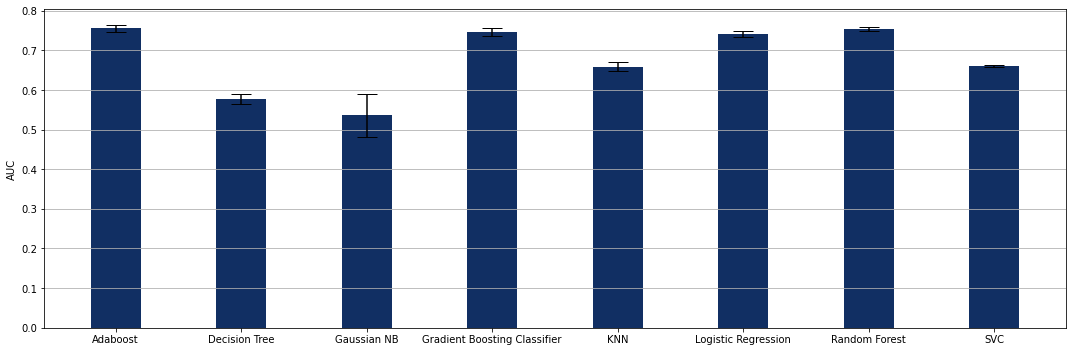

In [27]:
plt.rc('font', weight='regular')

modelos = ['Adaboost','Decision Tree','Gaussian NB','Gradient Boosting Classifier','KNN','Logistic Regression','Random Forest','SVC']
x_pos = np.arange(len(modelos))
AUCs = [0.7560156432269945,0.5769150583607545,0.5357293079610022,0.7454781514518167,0.6587439722280996,0.7405857507770836,0.7540072163791903,0.6609177268521327]
AUCstd = [0.00885501676805403,0.012856364446185986,0.055008664719974384,0.00962264674288635,0.01191028759594409,0.007727553003595933,0.005095069155882642,0.0030722168970185675]

# Build the plot
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(x_pos, AUCs, yerr=AUCstd, align='center', color='#112f63', capsize=10,width=0.4)
ax.set_ylabel('AUC')
ax.set_xticks(x_pos)
ax.set_xticklabels(modelos)
ax.yaxis.grid(True)

# Show figure
plt.tight_layout()
plt.show()

In [28]:
mid_start = 11
mid_end = 20

# Criar uma lista com o nome dos eventos e seus respectivos tempos
eventos = ['event{}'.format(i) for i in range(1, 201)]
tempos = ['event{}time'.format(i) for i in range(1, 201)]

# Filtrar apenas os eventos que aconteceram antes de 10 minutos
eventos_mid = []

for evento, tempo in zip(eventos, tempos):
    eventos_mid.append(df[(df[tempo] >= mid_start) & (df[tempo] <= mid_end)][evento])

eventos_mid.append(df[['blueTopGP','blueTopWR','blueTopKDA','blueJungleGP','blueJungleWR','blueJungleKDA','blueMidGP','blueMidWR','blueMidKDA','blueADCGP','blueADCWR','blueADCKDA','blueSupportGP','blueSupportWR','blueSupportKDA','redTopGP','redTopWR','redTopKDA','redJungleGP','redJungleWR','redJungleKDA','redMidGP','redMidWR','redMidKDA','redAdcGP','redAdcWR','redAdcKDA','redSupportGP','redSupportWR','redSupportKDA']])

# Criar um novo DataFrame com os eventos que aconteceram antes de 10 minutos
df_mid = pd.concat(eventos_mid, axis=1)
df_mid = df_mid.fillna(0)
df_mid = df_mid.astype(int)
X_mid = df_mid.copy()

# Analisando dados do mid game
models = [
        RandomForestClassifier(max_depth=50, n_estimators=600, min_samples_split=2, min_samples_leaf=1),
        LogisticRegression(max_iter=50000),
        SVC(C=100,gamma=0.001,kernel='rbf',max_iter=50000,probability=True),
        DecisionTreeClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(criterion='friedman_mse',learning_rate=0.025,loss='deviance',max_depth=4,max_features='log2',min_samples_leaf=8,min_samples_split=3, n_estimators=100,subsample=0.5),
        KNeighborsClassifier(n_neighbors=3),
        GaussianNB()
    ]

for model in models:    
    cv_modelo(model, X_mid)
    print('------------------')


RandomForestClassifier(max_depth=50, n_estimators=600)
fit_time: 0.7486020565032959 (+/- 0.06822134861911591)
score_time: 0.1240377426147461 (+/- 0.014956538374399399)
test_Balanced Accuracy: 0.6693376068376068 (+/- 0.06940663007270649)
test_Precision: 0.7430396400984636 (+/- 0.10054463939210657)
test_Recall: 0.71 (+/- 0.08209833161777262)
test_F1: 0.6918399623717553 (+/- 0.07241265831241327)
test_AUC: 0.7633547008547008 (+/- 0.09724687392922085)
------------------
LogisticRegression(max_iter=50000)
fit_time: 0.25710039138793944 (+/- 0.03632080740881553)
score_time: 0.009144783020019531 (+/- 0.0019535911004365234)
test_Balanced Accuracy: 0.5801282051282051 (+/- 0.12324957841664877)
test_Precision: 0.598341182626897 (+/- 0.11862103039218298)
test_Recall: 0.5947619047619048 (+/- 0.12472554904683326)
test_F1: 0.5875737273466892 (+/- 0.128042989362767)
test_AUC: 0.6343839031339031 (+/- 0.1436129048851175)
------------------
SVC(C=100, gamma=0.001, max_iter=50000, probability=True)
fit_time

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\User

AdaBoostClassifier()
fit_time: 0.06951394081115722 (+/- 0.005349066371012928)
score_time: 0.022869634628295898 (+/- 0.0024487802893768153)
test_Balanced Accuracy: 0.5759615384615385 (+/- 0.07030401614591038)
test_Precision: 0.5921988593417165 (+/- 0.07258453074213422)
test_Recall: 0.5957142857142858 (+/- 0.06701270736096106)
test_F1: 0.5885773225678232 (+/- 0.07405450349427373)
test_AUC: 0.5767806267806268 (+/- 0.08105043828178395)
------------------
GradientBoostingClassifier(learning_rate=0.025, max_depth=4,
                           max_features='log2', min_samples_leaf=8,
                           min_samples_split=3, subsample=0.5)
fit_time: 0.054981040954589847 (+/- 0.0037459132984943)
score_time: 0.011814022064208984 (+/- 0.0007547743690619221)
test_Balanced Accuracy: 0.6075854700854701 (+/- 0.07433133880802957)
test_Precision: 0.7277561550936162 (+/- 0.121266504633604)
test_Recall: 0.6719047619047618 (+/- 0.07044400809610415)
test_F1: 0.6170211925634617 (+/- 0.084893410269862

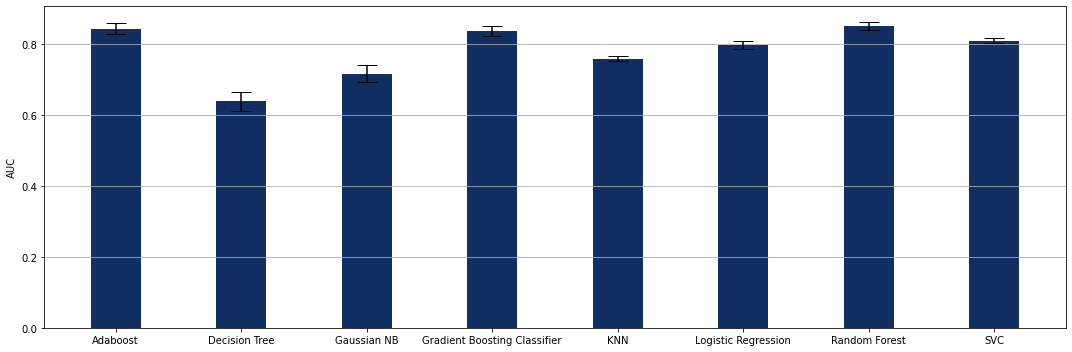

In [29]:
plt.rc('font', weight='regular')

modelos = ['Adaboost','Decision Tree','Gaussian NB','Gradient Boosting Classifier','KNN','Logistic Regression','Random Forest','SVC']
x_pos = np.arange(len(modelos))
AUCs = [0.8427751275541302,0.6390551641899445,0.7169620584686813,0.8380317473465736,0.7592678011200428,0.7972001154994782,0.8517394401460869,0.8100922812235934]
AUCstd = [0.015530312972271323,0.026460718275414113,0.02333979870358058,0.014088417114657959,0.0068460657830746756,0.011814788561282442,0.011510057226699547,0.006479739462834777]

# Build the plot
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(x_pos, AUCs, yerr=AUCstd, align='center', color='#112f63', capsize=10,width=0.4)
ax.set_ylabel('AUC')
ax.set_xticks(x_pos)
ax.set_xticklabels(modelos)
ax.yaxis.grid(True)

# Show figure
plt.tight_layout()
plt.show()

In [30]:
late_start = 21
late_end = 90

# Criar uma lista com o nome dos eventos e seus respectivos tempos
eventos = ['event{}'.format(i) for i in range(1, 201)]
tempos = ['event{}time'.format(i) for i in range(1, 201)]

# Filtrar apenas os eventos que aconteceram antes de 10 minutos
eventos_late = []

for evento, tempo in zip(eventos, tempos):
    eventos_late.append(df[(df[tempo] >= late_start) & (df[tempo] <= late_end)][evento])

eventos_late.append(df[['blueTopGP','blueTopWR','blueTopKDA','blueJungleGP','blueJungleWR','blueJungleKDA','blueMidGP','blueMidWR','blueMidKDA','blueADCGP','blueADCWR','blueADCKDA','blueSupportGP','blueSupportWR','blueSupportKDA','redTopGP','redTopWR','redTopKDA','redJungleGP','redJungleWR','redJungleKDA','redMidGP','redMidWR','redMidKDA','redAdcGP','redAdcWR','redAdcKDA','redSupportGP','redSupportWR','redSupportKDA']])

# Criar um novo DataFrame com os eventos que aconteceram antes de 10 minutos
df_late = pd.concat(eventos_late, axis=1)
df_late = df_late.fillna(0)
df_late = df_late.astype(int)
X_late = df_late.copy()

# Analisando dados do mid game
models = [
        RandomForestClassifier(max_depth=50, n_estimators=600, min_samples_split=2, min_samples_leaf=1),
        LogisticRegression(max_iter=50000),
        SVC(C=100,gamma=0.001,kernel='rbf',max_iter=50000,probability=True),
        DecisionTreeClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(criterion='friedman_mse',learning_rate=0.025,loss='deviance',max_depth=4,max_features='log2',min_samples_leaf=8,min_samples_split=3, n_estimators=100,subsample=0.5),
        KNeighborsClassifier(n_neighbors=3),
        GaussianNB()
    ]

for model in models:    
    cv_modelo(model, X_late)
    print('------------------')


RandomForestClassifier(max_depth=50, n_estimators=600)
fit_time: 0.6931418895721435 (+/- 0.03777624358906167)
score_time: 0.11131634712219238 (+/- 0.0017934865638527069)
test_Balanced Accuracy: 0.7713675213675213 (+/- 0.025789721977195507)
test_Precision: 0.7909255823541539 (+/- 0.02693906828602777)
test_Recall: 0.7880952380952382 (+/- 0.02651316363252393)
test_F1: 0.7854971073032211 (+/- 0.02496074348704769)
test_AUC: 0.8534722222222222 (+/- 0.07039321023109568)
------------------
LogisticRegression(max_iter=50000)
fit_time: 0.2119293689727783 (+/- 0.033415114155639566)
score_time: 0.009843158721923827 (+/- 0.0009317403366766745)
test_Balanced Accuracy: 0.5946581196581195 (+/- 0.038198590713922564)
test_Precision: 0.6106426906426906 (+/- 0.03599070063910075)
test_Recall: 0.6052380952380952 (+/- 0.02761904761904761)
test_F1: 0.6054426166426167 (+/- 0.03078200076038688)
test_AUC: 0.6235933048433048 (+/- 0.08799727839140137)
------------------
SVC(C=100, gamma=0.001, max_iter=50000, prob

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\User

AdaBoostClassifier()
fit_time: 0.07283825874328613 (+/- 0.001671508312521273)
score_time: 0.023066282272338867 (+/- 0.0025260171555697712)
test_Balanced Accuracy: 0.6308760683760684 (+/- 0.065172691583584)
test_Precision: 0.6619004524886878 (+/- 0.06636055045559272)
test_Recall: 0.6538095238095238 (+/- 0.06984920589831962)
test_F1: 0.6457814333814335 (+/- 0.0629470305063598)
test_AUC: 0.637108262108262 (+/- 0.1181911329977269)
------------------
GradientBoostingClassifier(learning_rate=0.025, max_depth=4,
                           max_features='log2', min_samples_leaf=8,
                           min_samples_split=3, subsample=0.5)
fit_time: 0.04182271957397461 (+/- 0.0018109134012374052)
score_time: 0.008836126327514649 (+/- 0.00020283772772753124)
test_Balanced Accuracy: 0.7130341880341879 (+/- 0.05412186906628404)
test_Precision: 0.7435106163677592 (+/- 0.05161905436304478)
test_Recall: 0.7404761904761905 (+/- 0.04785655057676615)
test_F1: 0.7319088406771875 (+/- 0.051260749766343

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


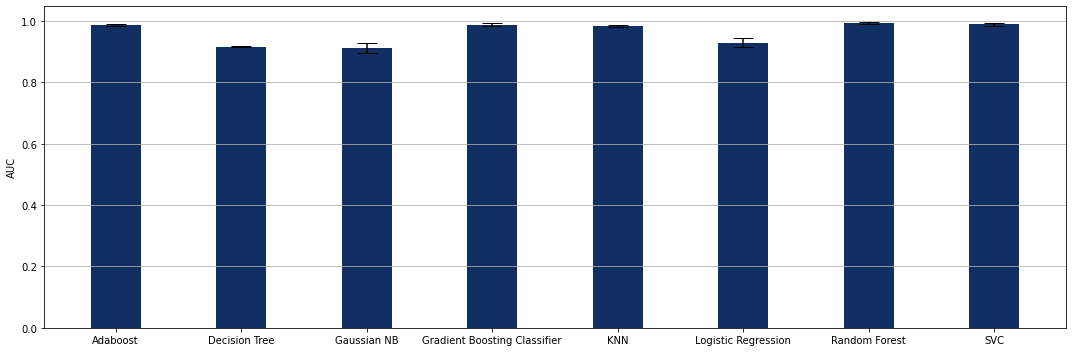

In [31]:
plt.rc('font', weight='regular')

modelos = ['Adaboost','Decision Tree','Gaussian NB','Gradient Boosting Classifier','KNN','Logistic Regression','Random Forest','SVC']
x_pos = np.arange(len(modelos))
AUCs = [0.9875610273761997,0.9171961741463754,0.9123419189820469,0.9890202972832451,0.9829747354394378,0.930094938999321,0.9950819983655987,0.9895660836386343]
AUCstd = [0.0032628687897486787,0.0026203682491829643,0.01580513227876294,0.005223893175153063,0.0030649550075297206,0.015533640264402071,0.0031867506858480545,0.003837786723791836]

# Build the plot
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(x_pos, AUCs, yerr=AUCstd, align='center', color='#112f63', capsize=10,width=0.4)
ax.set_ylabel('AUC')
ax.set_xticks(x_pos)
ax.set_xticklabels(modelos)
ax.yaxis.grid(True)

# Show figure
plt.tight_layout()
plt.show()

In [32]:
# Fazer previsões no conjunto de teste
y_pred = best_model.predict(X_test)
y_test = y_test.reset_index(drop=True)

NameError: name 'best_model' is not defined

In [ ]:
# Obtendo a importância das características
feature_importances = best_model.feature_importances_

# Criando um DataFrame para visualizar as importâncias
importance_df = pd.DataFrame({'Feature': X_late.columns, 'Importance': feature_importances})

# Ordenando as características pela importância
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualizando as 10 características mais importantes
importance_df.head(20)

In [ ]:
df_eventos = pd.read_csv('../../data/crawler/unified-events-statistics-with-kills.csv')

colunas = ['event45', 'event46', 'event47', 'event48', 'event44']  # Substitua com os nomes das suas colunas

for coluna in colunas:
    contagem = df_eventos[coluna].value_counts().head(5)  # Obtém as três maiores contagens
    print(f"Cinco valores mais frequentes em {coluna}:")
    print(contagem)
    print("="*30)

In [ ]:
df_eventos = pd.read_csv('../../data/crawler/unified-events-statistics-with-kills.csv')

colunas = ['event45time', 'event46time', 'event47time', 'event48time', 'event44time']  # Substitua com os nomes das suas colunas

for coluna in colunas:
    contagem = df_eventos[coluna].value_counts().head(5)  # Obtém as três maiores contagens
    print(f"Cinco valores mais frequentes em {coluna}:")
    print(contagem)
    print("="*30)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
y_prob = best_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)
partidas_erradas = y_test[y_test != y_pred].index.tolist()

print('Testes realizados com ' + str(len(y_test)) + ' partidas.')
print('Acurácia: ' + str(accuracy))
print('AUC: ' + str(auc))
for index in partidas_erradas:
    print('O resultado era ' + str(y_test[index]) + ' e o previsto foi ' + str(y_pred[index]))